In [63]:
import tensorflow as tf
import tensorflow_hub as hub
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

In [64]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.20)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\786me\Desktop\FinalYearProject\ASDScanPath\ASD\Images",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    r"C:\Users\786me\Desktop\FinalYearProject\ASDScanPath\ASD\Images", # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation') # set as validation data
img_size = (224, 224)

Found 439 images belonging to 2 classes.
Found 108 images belonging to 2 classes.


In [65]:


model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5"
feature_extractor_layer = hub.KerasLayer(model_url, input_shape=img_size+(3,), trainable=False)

model = tf.keras.Sequential([
    feature_extractor_layer,tf.keras.layers.Dropout(0.2)
])



In [66]:
# Build a new model by adding a classification layer on top of the feature extractor
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units= 128, activation = 'relu'))
##model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units= 1, activation = 'sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = opt, loss = 'binary_focal_crossentropy', metrics = ['accuracy'])





In [67]:
history = model.fit(train_generator, validation_data=validation_generator, epochs = 5)

Epoch 1/5
 9/14 [==================>...........] - ETA: 1s - loss: 0.3914 - accuracy: 0.5520

KeyboardInterrupt: 

In [13]:
##Confusion Matrix Generator and ROC Curve
y_pred_real = model.predict(validation_generator)
y_pred = [int(p >= 0.5) for p in y_pred_real] ##With sigmoid 1 neuron
##y_pred = np.argmax(Y_pred, axis=1) ##With softmax and 2 neurons 
y_true = validation_generator.classes
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
print(cm)

4/4 [==============================] - 2s 269ms/step
[[26 39]
 [11 32]]


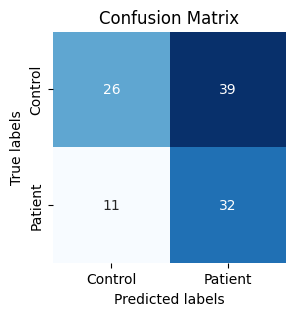

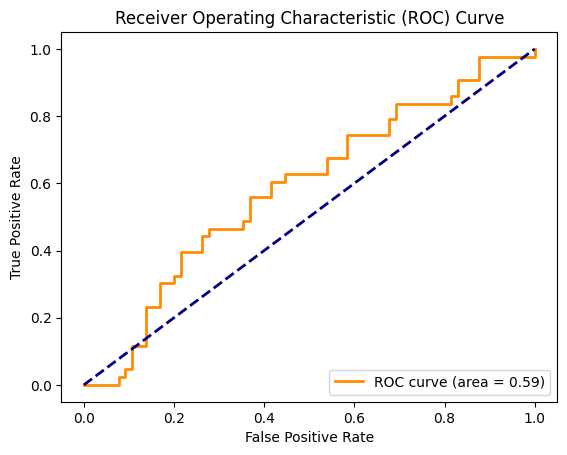

In [14]:
# Define the class labels
class_names = validation_generator.class_indices.keys()
import seaborn as sns
# Plot the confusion matrix as an image
fig, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

# Calculate the ROC curve and AUC score, sklearn takes probabilities instead of classes
fpr, tpr, thresholds = roc_curve(y_true, y_pred_real)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [68]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                                            include_top=False,
                                                            weights='imagenet')

base_model.trainable = True
for layer in base_model.layers[:150]:
    layer.trainable=False
for layer in base_model.layers[150:]:
    layer.trainable=True

for i,layer in enumerate(base_model.layers):
    print(i,layer.name,layer.trainable)



0 input_16 False
1 Conv1 False
2 bn_Conv1 False
3 Conv1_relu False
4 expanded_conv_depthwise False
5 expanded_conv_depthwise_BN False
6 expanded_conv_depthwise_relu False
7 expanded_conv_project False
8 expanded_conv_project_BN False
9 block_1_expand False
10 block_1_expand_BN False
11 block_1_expand_relu False
12 block_1_pad False
13 block_1_depthwise False
14 block_1_depthwise_BN False
15 block_1_depthwise_relu False
16 block_1_project False
17 block_1_project_BN False
18 block_2_expand False
19 block_2_expand_BN False
20 block_2_expand_relu False
21 block_2_depthwise False
22 block_2_depthwise_BN False
23 block_2_depthwise_relu False
24 block_2_project False
25 block_2_project_BN False
26 block_2_add False
27 block_3_expand False
28 block_3_expand_BN False
29 block_3_expand_relu False
30 block_3_pad False
31 block_3_depthwise False
32 block_3_depthwise_BN False
33 block_3_depthwise_relu False
34 block_3_project False
35 block_3_project_BN False
36 block_4_expand False
37 block_4_exp

In [70]:

model = tf.keras.Sequential([
    base_model,
    model.add(tf.keras.layers.Flatten()),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(units= 1, activation = 'sigmoid')
])

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.summary()

TypeError: The added layer must be an instance of class Layer. Received: layer=None of type <class 'NoneType'>.

In [62]:
history = model.fit(train_generator, validation_data=validation_generator, epochs = 5)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\786me\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\786me\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\786me\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\786me\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\786me\AppData\Roaming\Python\Python311\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "C:\Users\786me\AppData\Roaming\Python\Python311\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\786me\AppData\Roaming\Python\Python311\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\786me\AppData\Roaming\Python\Python311\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\786me\AppData\Roaming\Python\Python311\site-packages\keras\losses.py", line 2156, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\786me\AppData\Roaming\Python\Python311\site-packages\keras\backend.py", line 5707, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, None, None, 1) vs (None,)).
